# Predicting Stalling in Vertical Axis Wind Turbines

## The Problem

Vertical Axis Wind Turbines (VAWTs) can suffer mechanical damage if they do not break before reaching peak generator power. Breaking these turbines too far in advance, however, leads to lower power output. It is therefore important to predict the fluid torque that may cause a turbine to reach this state before it happens.


## The Data

## The Conclusions

## The Approach

TauF = ddTheta*I-ThetaC


I = .0085 kg*m^2

All units are SI

Data was recorded at 1000 Hz

In [1]:
#load packages

import pandas as pd
import json
import os

In [31]:
# Reading the json as a dict
with open('high_turbulence/run_01.txt') as json_data:
    data = json.load(json_data)

In [40]:
df = pd.DataFrame.from_dict(data, orient = 'index')

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19630,19631,19632,19633,19634,19635,19636,19637,19638,19639
torque,0.154538,0.125633,0.053472,0.061200,0.136655,0.150880,0.080629,0.055664,0.114686,0.164234,...,0.049959,0.094061,0.128185,0.105266,0.053336,0.088476,0.150225,0.154517,0.079006,0.074732
theta,4.688990,4.705385,4.721803,4.738269,4.754808,4.771370,4.787980,4.804590,4.821272,4.838002,...,4.534202,4.551028,4.567878,4.584728,4.601625,4.618499,4.635373,4.652390,4.669336,4.686306
dtheta,16.394420,16.406404,16.438362,16.497998,16.543537,16.581749,16.619154,16.649195,16.696668,16.741054,...,16.826074,16.839672,16.851979,16.861300,16.880245,16.906009,16.934946,16.991634,16.957678,16.969662
ddtheta,23.968450,23.968450,47.936900,46.224867,40.881252,40.466214,37.509068,40.154935,40.725613,40.310575,...,16.497764,14.215055,11.102269,19.143632,20.855664,21.530101,23.968450,17.120321,23.968450,23.968450
power,2.533564,2.061193,0.878988,1.009681,2.260764,2.501861,1.339982,0.926765,1.914868,2.749444,...,0.840612,1.583961,2.160178,1.774915,0.900329,1.495775,2.544056,2.625493,1.339762,1.268172


In [36]:
df.shape

(7, 19640)

In [42]:
df = df.transpose()

In [43]:
df.head()

,torque,theta,dtheta,ddtheta,power,u,uInds
0,0.154538,4.688990,16.394420,23.968450,2.533564,0.685006,1.0
1,0.125633,4.705385,16.406404,23.968450,2.061193,0.677085,1.0
2,0.053472,4.721803,16.438362,47.936900,0.878988,0.681375,1.0
3,0.061200,4.738269,16.497998,46.224867,1.009681,0.640711,1.0
4,0.136655,4.754808,16.543537,40.881252,2.260764,0.671847,1.0


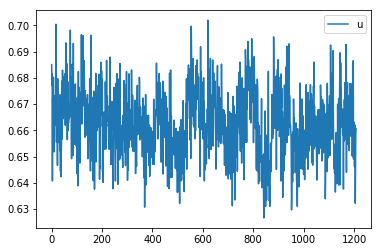

In [47]:
df.plot(y='u')

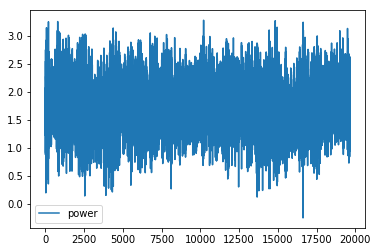

In [48]:
df.plot(y='power')

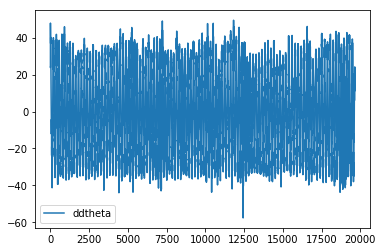

In [49]:
df.plot(y='ddtheta')

In [52]:
df.isna().sum()

torque         0
theta          0
dtheta         0
ddtheta        0
power          0
u          18431
uInds      18431
dtype: int64

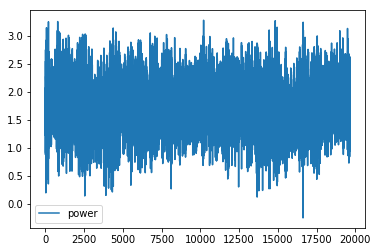

In [53]:
df.plot(y='power')

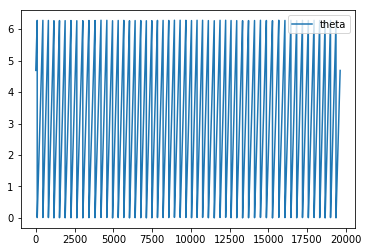

In [54]:
df.plot(y='theta')

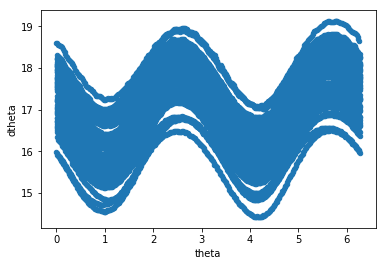

In [55]:
df.plot(x='theta',y='dtheta',kind='scatter')

TauF = ddTheta*I-ThetaC


I = .0085 kg*m^2

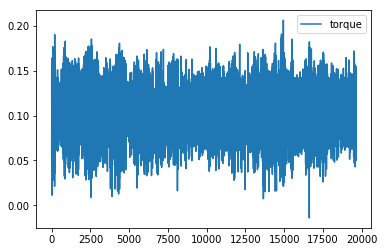

In [58]:
df.plot(y='torque')

In [94]:
df['torque_mean']=df['torque'].rolling(1000).mean()

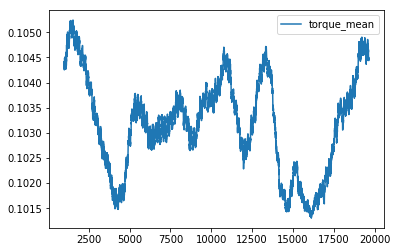

In [95]:
df.plot(y='torque_mean')